# Deriving a vegetation index from PlanetScope imagery

Researchers often use a vegetation index called NDVI to measure the "greeenness" or density of vegetation across a landscape. In addition to monitoring vegetation health, NDVI (Normalized Difference Vegetation Index) can be used to track climate change, agricultural production, desertification, and land cover change. Developed by NASA scientist Compton Tucker in 1977, NDVI is derived from satellite imagery and compares reflected near-infrared light to reflected visible red light. It can be expressed as following equation:

![ndvi-equation.png](images/ndvi-equation.png)

In general, healthy and/or dense vegetation reflects a lot of near-infrared light and not as much red visible light. Conversely, when vegetation is sparse or not-so-healthy, its near-infrared reflectance decreases and its red light reflectance increases. You can read more about how NDVI is used to study cyclical, seasonal, and long-term changes to the Earth's physical characteristics from [NASA](https://earthobservatory.nasa.gov/Features/MeasuringVegetation/measuring_vegetation_1.php) and [USGS](https://phenology.cr.usgs.gov/ndvi_foundation.php) researchers. 

**In this guide, you'll perform a basic NDVI calculation on PlanetScope imagery using just a few lines of Python. Here are the steps:**

1. Download a PlanetScope image
2. Extract data from the red and near-infrared bands
3. Normalize the data
4. Perform the NDVI calculation
5. Save the NDVI image
6. Apply a color scheme and visualize NDVI on a map
7. Generate a histogram to view NDVI values 

### Requirements
- Python 2.7 or 3+
- [Planet's Python Client](https://www.planet.com/docs/api-quickstart-examples/cli/)
- [rasterio](https://github.com/mapbox/rasterio)
- [numpy](http://www.numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [Planet API Key](https://www.planet.com/account/#/), stored as environment variable `$PL_API_KEY`.
- [Planet 4-Band Imagery](https://www.planet.com/docs/imagery-quickstart/) with the following specifications: `item-type`: `PSOrthoTile`, `REOrthoTile`, or `PSScene4Band`; `asset-type`: `analytic`, or `basic_analytic`

## Step 1. Download a PlanetScope image 

First, you're going to download a [4-band PlanetScope satellite image](https://www.planet.com/docs/spec-sheets/sat-imagery/#ps-imagery-product) of agricultural land in California's Central Valley, captured in late August 2016 (`item-id`: `20160831_180302_0e26`). You can do this using [Planet's Python client](https://www.planet.com/docs/api-quickstart-examples/cli/) to interact with our Data API, or by browsing [Planet Explorer](https://www.planet.com/products/explorer/), filtering for 4 Band PlanetScope scene (`PSScene4Band`) or Planetscope ortho tile (`PSOrthoTile`), and downloading an `analytic` asset.

Before you download the full image, you can [preview a thumbnail](https://www.planet.com/docs/reference/data-api/previews/) of the image via Planet's Data API. (The thumbnails are 256x256 by default, and can be scaled up to 512x512 by passing in a `width` parameter.) 

In [1]:
from IPython.display import Image
Image(url="https://api.planet.com/data/v1/item-types/PSScene4Band/items/20160831_180302_0e26/thumb?width=512")

Next, you'll use [Planet's Python client](https://planetlabs.github.io/planet-client-python/index.html) to download the image. *Note: when you run this command, you'll get a stream of messages in your Jupyter notebook as the Python client polls the Data API to determine if the image is [activated and ready to download](https://www.planet.com/docs/api-quickstart-examples/step-2-download/#activate).*

In [2]:
!planet data download --item-type PSScene4Band --dest data --asset-type analytic,analytic_xml --string-in id 20160831_180302_0e26

activating: 0            complete: 0              elapsed: 0                    
paging: False            pending: 0                                             

activating: 1            complete: 0              downloaded: 0.00MB            
downloading: 0           elapsed: 1               paging: True                  
pending: 0                                                                      

activating: 1            complete: 0              downloaded: 0.00MB            
downloading: 0           elapsed: 2               paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 0.00MB            
downloading: 1           elapsed: 3               paging: False                 
pending: 1                                                                      

activating: 0            complete: 0              downloaded: 0.33MB            
downloading: 2          

activating: 0            complete: 0              downloaded: 15.08MB           
downloading: 2           elapsed: 31              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 15.51MB           
downloading: 2           elapsed: 32              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 15.94MB           
downloading: 2           elapsed: 33              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 16.43MB           
downloading: 2           elapsed: 34              paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 23.77MB           
downloading: 2           elapsed: 62              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 24.09MB           
downloading: 2           elapsed: 63              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 24.36MB           
downloading: 2           elapsed: 64              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 24.59MB           
downloading: 2           elapsed: 65              paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 32.19MB           
downloading: 2           elapsed: 93              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 32.55MB           
downloading: 2           elapsed: 94              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 32.88MB           
downloading: 2           elapsed: 95              paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 33.14MB           
downloading: 2           elapsed: 96              paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 42.28MB           
downloading: 2           elapsed: 124             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 42.77MB           
downloading: 2           elapsed: 125             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 43.23MB           
downloading: 2           elapsed: 126             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 43.62MB           
downloading: 2           elapsed: 127             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 58.14MB           
downloading: 2           elapsed: 155             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 58.57MB           
downloading: 2           elapsed: 156             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 58.96MB           
downloading: 2           elapsed: 157             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 59.45MB           
downloading: 2           elapsed: 158             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 71.02MB           
downloading: 2           elapsed: 186             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 71.61MB           
downloading: 2           elapsed: 187             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 72.23MB           
downloading: 2           elapsed: 188             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 72.95MB           
downloading: 2           elapsed: 189             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 83.04MB           
downloading: 2           elapsed: 217             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 83.34MB           
downloading: 2           elapsed: 218             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 83.60MB           
downloading: 2           elapsed: 219             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 83.90MB           
downloading: 2           elapsed: 220             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 91.50MB           
downloading: 2           elapsed: 248             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 91.66MB           
downloading: 2           elapsed: 249             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 91.86MB           
downloading: 2           elapsed: 250             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 92.02MB           
downloading: 2           elapsed: 251             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 99.63MB           
downloading: 2           elapsed: 279             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 99.85MB           
downloading: 2           elapsed: 280             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 100.05MB          
downloading: 2           elapsed: 281             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 100.21MB          
downloading: 2           elapsed: 282             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 106.60MB          
downloading: 2           elapsed: 310             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 106.87MB          
downloading: 2           elapsed: 311             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 107.13MB          
downloading: 2           elapsed: 312             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 107.42MB          
downloading: 2           elapsed: 313             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 116.27MB          
downloading: 2           elapsed: 341             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 116.60MB          
downloading: 2           elapsed: 342             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 116.96MB          
downloading: 2           elapsed: 343             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 117.19MB          
downloading: 2           elapsed: 344             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 122.63MB          
downloading: 2           elapsed: 372             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 122.79MB          
downloading: 2           elapsed: 373             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 122.99MB          
downloading: 2           elapsed: 374             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 123.15MB          
downloading: 2           elapsed: 375             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 128.10MB          
downloading: 2           elapsed: 403             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 128.23MB          
downloading: 2           elapsed: 404             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 128.40MB          
downloading: 2           elapsed: 405             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 128.49MB          
downloading: 2           elapsed: 406             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 132.03MB          
downloading: 2           elapsed: 433             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 132.20MB          
downloading: 2           elapsed: 434             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 132.33MB          
downloading: 2           elapsed: 435             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 132.46MB          
downloading: 2           elapsed: 436             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 138.16MB          
downloading: 2           elapsed: 464             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 138.39MB          
downloading: 2           elapsed: 465             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 138.72MB          
downloading: 2           elapsed: 466             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 138.75MB          
downloading: 2           elapsed: 467             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 144.09MB          
downloading: 2           elapsed: 495             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 144.32MB          
downloading: 2           elapsed: 496             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 144.52MB          
downloading: 2           elapsed: 497             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 144.71MB          
downloading: 2           elapsed: 498             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 150.51MB          
downloading: 2           elapsed: 526             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 150.81MB          
downloading: 2           elapsed: 527             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 151.10MB          
downloading: 2           elapsed: 528             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 151.53MB          
downloading: 2           elapsed: 529             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 159.03MB          
downloading: 2           elapsed: 557             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 159.13MB          
downloading: 2           elapsed: 558             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 159.23MB          
downloading: 2           elapsed: 559             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 159.36MB          
downloading: 2           elapsed: 560             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 164.01MB          
downloading: 2           elapsed: 588             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 164.31MB          
downloading: 2           elapsed: 589             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 164.57MB          
downloading: 2           elapsed: 590             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 164.87MB          
downloading: 2           elapsed: 591             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 170.47MB          
downloading: 2           elapsed: 620             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 170.67MB          
downloading: 2           elapsed: 621             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 170.90MB          
downloading: 2           elapsed: 622             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 171.16MB          
downloading: 2           elapsed: 623             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 179.91MB          
downloading: 2           elapsed: 651             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 180.53MB          
downloading: 2           elapsed: 652             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 180.92MB          
downloading: 2           elapsed: 653             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 181.28MB          
downloading: 2           elapsed: 654             paging: False                 
pending: 0                                                                      

activating: 0           

activating: 0            complete: 0              downloaded: 194.39MB          
downloading: 2           elapsed: 682             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 194.78MB          
downloading: 2           elapsed: 683             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 195.31MB          
downloading: 2           elapsed: 684             paging: False                 
pending: 0                                                                      

activating: 0            complete: 0              downloaded: 195.83MB          
downloading: 2           elapsed: 685             paging: False                 
pending: 0                                                                      

activating: 0           

**Congratulations!** You now have two files in your `data` directory: `20160831_180302_0e26_3B_AnalyticMS.tif` and `20160831_180302_0e26_3B_AnalyticMS_metadata.xml`. The first file is a GeoTIFF, the image you requested with spatial reference data embedded. The second file is a metadata file for that image that includes the data you'll need to calculate the NDVI. 

## Step 2. Extract the data from the red and near-infrared bands 

In this step, you'll use [Rasterio](https://github.com/mapbox/rasterio), a Python library for reading and writing geospatial raster datasets, to open the raster image you downloaded (the .tif file). Then you'll extract the data from the red and near-infrared bands and load the band data into arrays that you can manipulate using Python's [NumPy](http://www.numpy.org/) libary. *Note: in PlanetScope 4-band images, the band order is BGRN: (1) Blue, (2) Green, (3) Red, (4) Near-infrared.*

In [3]:
import rasterio
import numpy as np

filename = "data/20160831_180302_0e26_3B_AnalyticMS.tif"

# Load red and NIR bands - note all PlanetScope 4-band images have band order BGRN
with rasterio.open(filename) as src:
    band_red = src.read(3)

with rasterio.open(filename) as src:
    band_nir = src.read(4)

## Step 3. Normalize the band data

Before you can calculate NDVI, you must normalize the values in the arrays for each band using the [Top of Atmosphere (TOA) reflectance coefficients](https://landsat.usgs.gov/using-usgs-landsat-8-product) stored in metadata file you downloaded (the .xml file).

In [4]:
from xml.dom import minidom

xmldoc = minidom.parse("data/20160831_180302_0e26_3B_AnalyticMS_metadata.xml")
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

# XML parser refers to bands by numbers 1-4
coeffs = {}
for node in nodes:
    bn = node.getElementsByTagName("ps:bandNumber")[0].firstChild.data
    if bn in ['1', '2', '3', '4']:
        i = int(bn)
        value = node.getElementsByTagName("ps:reflectanceCoefficient")[0].firstChild.data
        coeffs[i] = float(value)
        
# Multiply the Digital Number (DN) values in each band by the TOA reflectance coefficients
band_red = band_red * coeffs[3]
band_nir = band_nir * coeffs[4]

## Step 4. Perform the NDVI calculation

Next, you're going to calculate NDVI through subtraction and division of the normalized values stored in the NumPy arrays. This calculation will give you NDVI values that range from -1 to 1. Values closer to 1 indicate a greater density of vegetation or higher level of "greenness."

In [5]:
# Allow division by zero
np.seterr(divide='ignore', invalid='ignore')

# Calculate NDVI. This is the equation at the top of this guide expressed in code
ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

In [6]:
# check range NDVI values, excluding NaN
np.nanmin(ndvi), np.nanmax(ndvi)

(-0.4717458241075093, 0.7994587936165949)

## Step 5. Save the NDVI image 

Next, you're going to save the calculated NDVI values to a new image file, making sure the new image file has the same geospatial metadata as the original GeoTIFF we downloaded.

In [7]:
# Set spatial characteristics of the output object to mirror the input
kwargs = src.meta
kwargs.update(
    dtype=rasterio.float32,
    count = 1)

# Write band calculations to a new raster file
with rasterio.open('output/ndvi.tif', 'w', **kwargs) as dst:
        dst.write_band(1, ndvi.astype(rasterio.float32))

## Step 6. Apply a color scheme to visualize the NDVI values on the image

In the last two steps, you'll use [Matplotlib](https://matplotlib.org/) to visualize the NDVI values you calculated for the PlanetScope scene. First you'll view a map of the NDVI values; then you'll generate a histogram of NDVI values. 

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

"""
The NDVI values will range from -1 to 1. You want to use a diverging color scheme to visualize the data,
and you want to center the colorbar at a defined midpoint. The class below allows you to normalize the colorbar.
"""

class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    Credit: Joe Kington, http://chris35wills.github.io/matplotlib_diverging_colorbar/
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


# Set min/max values from NDVI range for image (excluding NAN)
# set midpoint according to how NDVI is interpreted: https://earthobservatory.nasa.gov/Features/MeasuringVegetation/
min=np.nanmin(ndvi)
max=np.nanmax(ndvi)
mid=0.1

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# diverging color scheme chosen from https://matplotlib.org/users/colormaps.html
cmap = plt.cm.RdYlGn 

cax = ax.imshow(ndvi, cmap=cmap, clim=(min, max), norm=MidpointNormalize(midpoint=mid,vmin=min, vmax=max))

ax.axis('off')
ax.set_title('Normalized Difference Vegetation Index', fontsize=18, fontweight='bold')

cbar = fig.colorbar(cax, orientation='horizontal', shrink=0.65)

fig.savefig("output/ndvi-fig.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()

<Figure size 2000x1000 with 2 Axes>

## 7. Generate a histogram of NDVI values

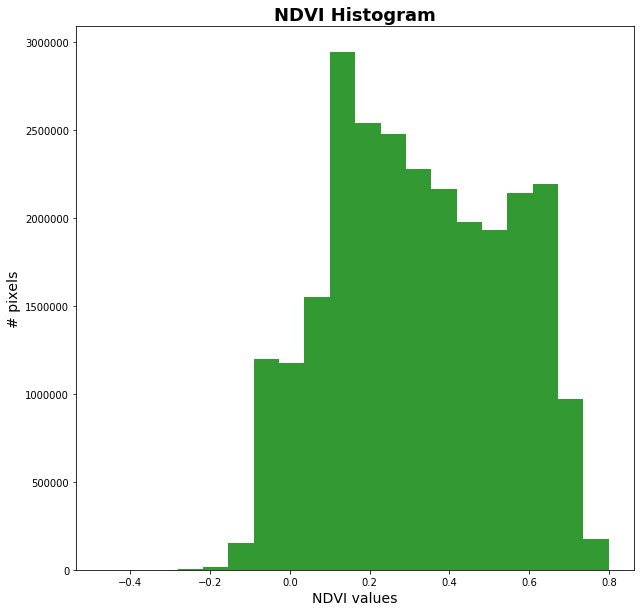

In [9]:
fig2 = plt.figure(figsize=(10,10))
ax = fig2.add_subplot(111)

plt.title("NDVI Histogram", fontsize=18, fontweight='bold')
plt.xlabel("NDVI values", fontsize=14)
plt.ylabel("# pixels", fontsize=14)


x = ndvi[~np.isnan(ndvi)]
numBins = 20
ax.hist(x,numBins,color='green',alpha=0.8)

fig2.savefig("output/ndvi-histogram.png", dpi=200, bbox_inches='tight', pad_inches=0.7)

plt.show()